# Cours PCD - Labo 5 : Comparison of F-test and mutual information

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_regression, mutual_info_regression

## Création des données

In [2]:
np.random.seed(0)
N = 1000

In [3]:
x = np.random.rand(N, 3)

# y = x1 + sin(6*pi*x2) + 0.1 * (random value from normal distribution)
y = x[:, 0] + np.sin(6 * np.pi * x[:, 1]) + 0.1 * np.random.randn(N)

In [4]:
x[0]

array([0.5488135 , 0.71518937, 0.60276338])

In [5]:
y[0]

1.5211975087574658

## Calcul du F-test

Pour chaque dimension, `f_regression` calcul d'abord le coefficient de corrélation de Pearson, puis un score F statistique qui correspond à la formule suivante:
```
F = MSR / MSE
ou
F = Mean sum of squares regression / Mean sum of squares error
```

Soit la moyenne des sommes de variance du modèle divisée par la moyenne des somme des résidus

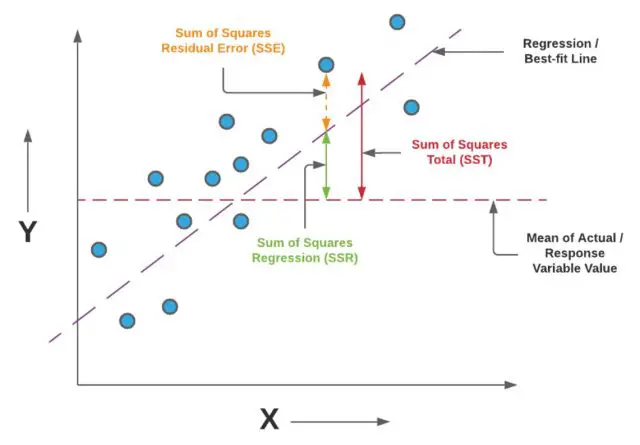!

Cette valeur F suit une "F-distribution" ou loi de Fischer

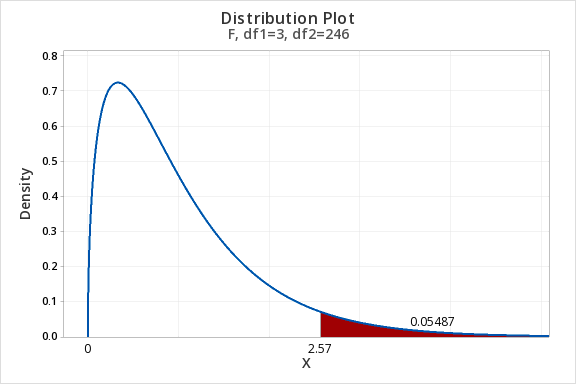!

Plus la valeur de F est faible, plus l'hypothèse nulle (grossièrement, le modèle de regression est mauvais) est probable.

`f_regression` retourne également les _p-values_ des scores vis-à-vis de cette distribution.

(Source : https://vitalflux.com/interpreting-f-statistics-in-linear-regression-formula-examples/)

In [6]:
f_test, p_f_test = f_regression(x, y)

In [7]:
print(f_test)
print(p_f_test)

[187.42118421  52.52357392   0.47268298]
[3.19286906e-39 8.50243215e-13 4.91915197e-01]


#### Normalisation max

In [8]:
f_test /= np.max(f_test)
f_test

array([1.        , 0.28024353, 0.00252204])

## Calcul de l'information mutuelle

L'information mutuelle mesure la dépendance entre deux variables, mêmes non-linéaires.

Elle prend une valeur de 0 de si les variables sont indépendantes, et une valeur de supérieure si elles sont dépendantes.

L'implémentation de Scikit-learn utilise une méthode des plus proches voisins pour estimer cette valeur.

In [9]:
mi = mutual_info_regression(x, y)
mi

array([0.31431334, 0.86235026, 0.        ])

#### Normalisation max

In [10]:
mi /= np.max(mi)
mi

array([0.36448455, 1.        , 0.        ])

## Comparaisons F-test et information mutuelle

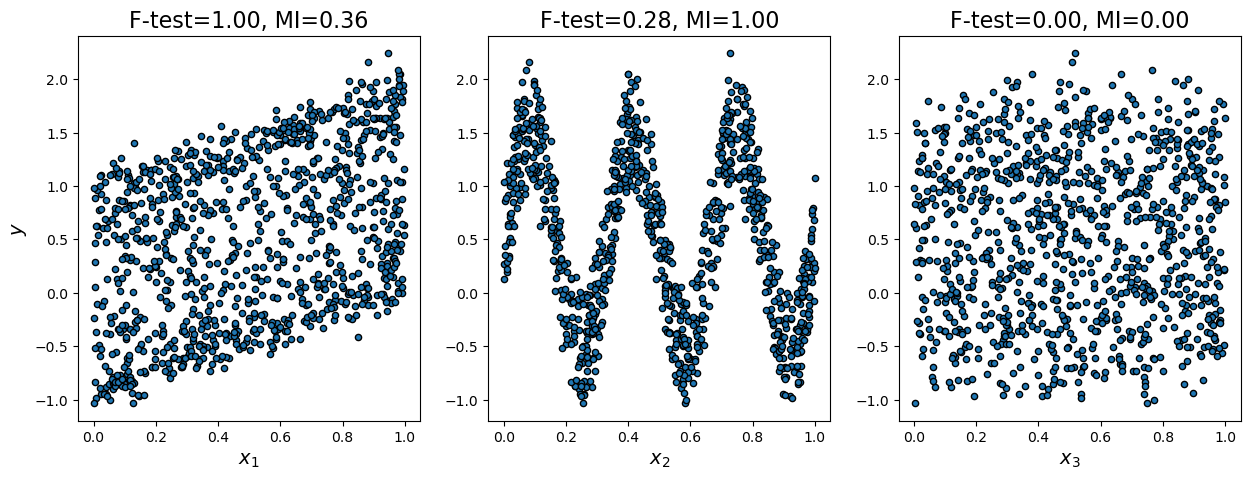

In [11]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title(f"F-test={f_test[i]:.2f}, MI={mi[i]:.2f}", fontsize=16)
plt.show()